Clusttering And Fittting

Descriptive Statistics for Life Expectancy:
count    179.00
mean      68.86
std        9.20
min       45.61
25%       62.30
50%       71.51
75%       74.94
max       82.46
Name: Life_expectancy, dtype: float64


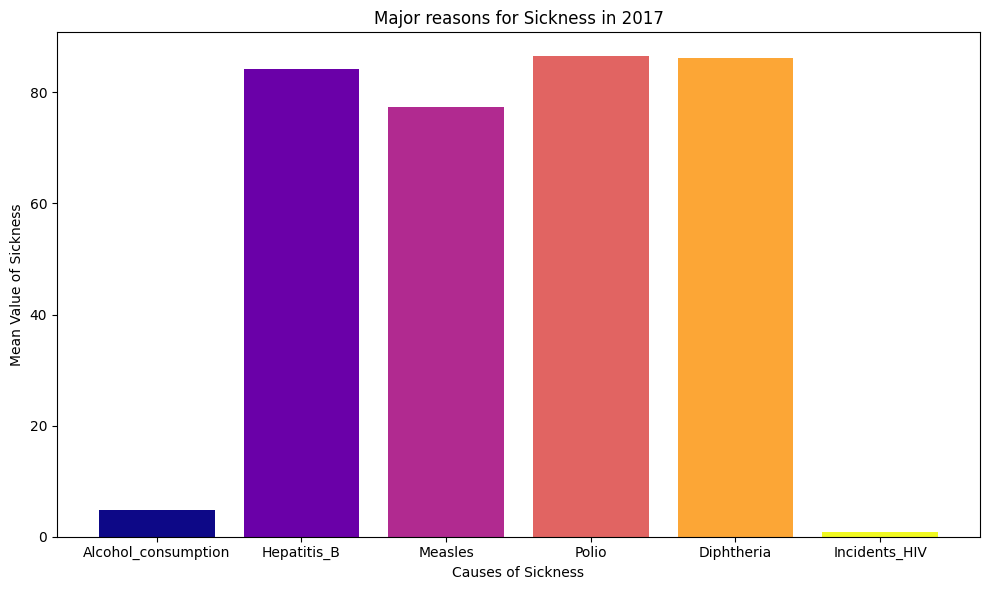

Standard Deviation of Life Expectancy: 9.2
Kurtosis of Life Expectancy: -0.48
Skewness of Life Expectancy: -0.69
Correlation Matrix:
                   Infant_deaths  Under_five_deaths  Adult_mortality
Infant_deaths               1.00               0.99             0.80
Under_five_deaths           0.99               1.00             0.81
Adult_mortality             0.80               0.81             1.00


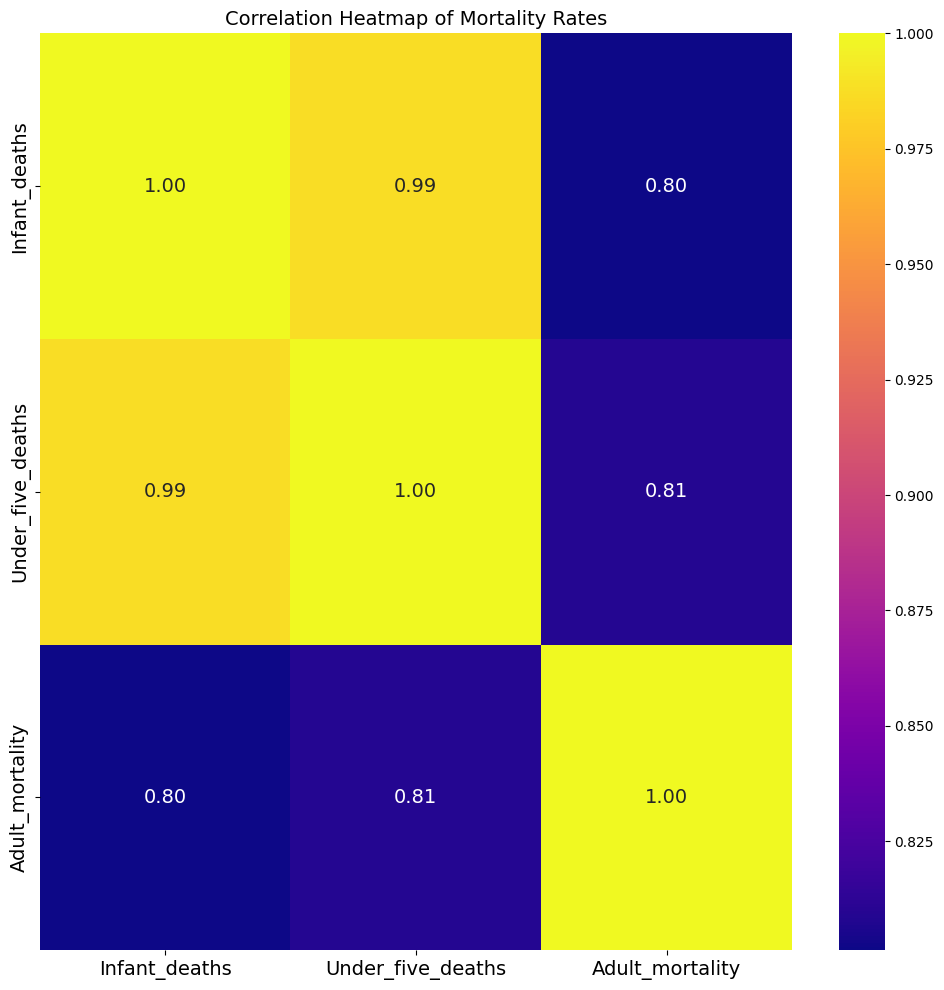

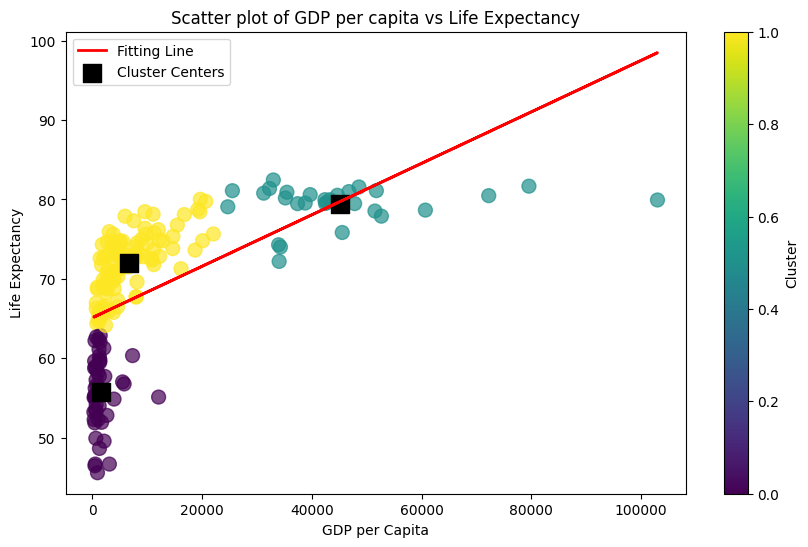

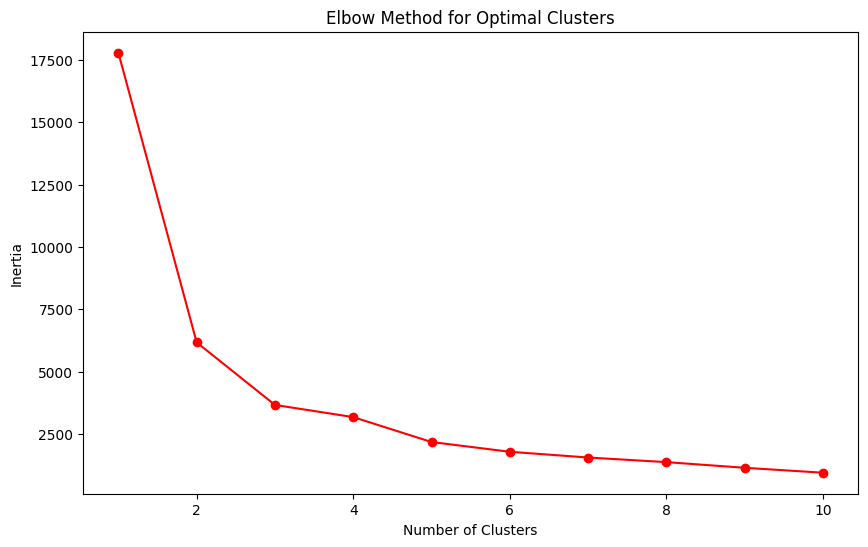

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import colormaps  

def load_dataset():
    data = pd.read_csv('/Users/bharathi/Documents/ADS2/Life-Expectancy-Data-Averaged.csv')
    return data

def preprocess_data(data):
    data = data.dropna()  # Remove missing values
    data['Economy_status'] = data['Economy_status'].map({1: 'Developing', 0: 'Developed'})   
    return data

def plot_barchart(data):
    col_hist = ['Alcohol_consumption', 'Hepatitis_B', 'Measles', 'Polio', 'Diphtheria', 'Incidents_HIV']
    averages = data[col_hist].mean()
    colors = colormaps['plasma'](np.linspace(0, 1, len(col_hist)))  # Updated colormap usage
    plt.figure(figsize=(10, 6))
    plt.bar(averages.index, averages.values, color=colors)
    plt.xlabel("Causes of Sickness")
    plt.ylabel("Mean Value of Sickness")
    plt.title("Major reasons for Sickness in 2017")
    plt.tight_layout()
    desc_stats = data['Life_expectancy'].describe()
    print("Descriptive Statistics for Life Expectancy:")
    print(round(desc_stats, 2))
    plt.show()

def plot_heatmap(data):
    corr_matrix = data[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality']].corr()
    std_life = data['Life_expectancy'].std()
    kurt_life = data['Life_expectancy'].kurtosis()
    skew_life = data['Life_expectancy'].skew()
    print(f"Standard Deviation of Life Expectancy: {round(std_life, 2)}")
    print(f"Kurtosis of Life Expectancy: {round(kurt_life, 2)}")
    print(f"Skewness of Life Expectancy: {round(skew_life, 2)}")
    print(f"Correlation Matrix:\n{round(corr_matrix, 2)}")
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f", cbar=True, annot_kws={"fontsize": 14})
    plt.title("Correlation Heatmap of Mortality Rates", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()

def Clustering_Scatter_method(data):
    numerical_features = ['GDP_per_capita', 'Life_expectancy']
    data_numerical = data[numerical_features].dropna()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_numerical)
    optimal_clusters = 3
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    data['Cluster'] = clusters
    return data, kmeans, scaler

def Clustering_elbow_method(data):
    numerical_features = ['Alcohol_consumption', 'Life_expectancy']
    data_numerical = data[numerical_features].dropna()
    inertia = []
    range_clusters = range(1, 11)
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data_numerical)
        inertia.append(kmeans.inertia_)
    return inertia, range_clusters


def fitting_method(data):
    X = data[['GDP_per_capita']].values.reshape(-1, 1)
    y = data['Life_expectancy'].values
    regressor = LinearRegression()
    regressor.fit(X, y)
    line_pred = regressor.predict(X)
    return line_pred


def plot_scatter(data, kmeans, scaler, line_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['GDP_per_capita'], data['Life_expectancy'], c=data['Cluster'], cmap='viridis', s=100, alpha=0.7)
    plt.plot(data['GDP_per_capita'], line_pred, color='red', linewidth=2, label='Fitting Line')
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=150, c='black', marker='s', label='Cluster Centers')
    plt.title('Scatter plot of GDP per capita vs Life Expectancy')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Life Expectancy')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()

def elbow_plot(inertia, range_clusters):
    plt.figure(figsize=(10, 6))
    plt.plot(range_clusters, inertia, marker='o', linestyle='-', color='red')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

def main_function():
    data = load_dataset()
    data = preprocess_data(data)
    plot_barchart(data)
    plot_heatmap(data)
    data, kmeans, scaler = Clustering_Scatter_method(data)
    line_pred = fitting_method(data)
    inertia, range_clusters = Clustering_elbow_method(data)
    plot_scatter(data, kmeans, scaler, line_pred)
    elbow_plot(inertia, range_clusters)

if __name__ == "__main__":
    main_function()
